https://www.markdownguide.org/cheat-sheet/

# Testarea Automată a Circuitelor
        --- Îndrumar de Laborator ---

### Lucrarea nr. 3.2 - Pragurile de Enable ale unui LDO

#### 1.1 Montajul experimental:
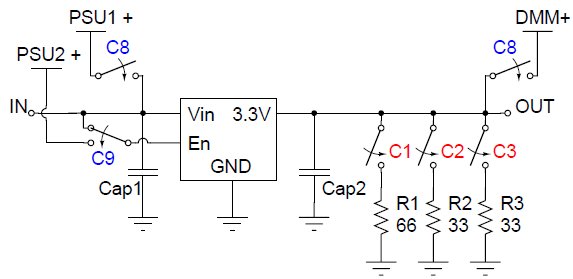

#### 1.2 Procedura de masurare:
Multimetrul măsoară tensiunea de iesire a stabilizatorului LDO. Tensiunea aplicata pe Enable poate fi monitorizata cu sursa de alimemtare. Se variaza tensiunea pe pinul Enable si se monitorizeaza tensiunea de iesire.


#### 1.3 Codul sursa:
1.3.1 Initializarea instrumentelor si a interfetelor grafice

In [ ]:
#using TIVM; # libraria responsabila de comunicatia cu instrumentele si cu interfetele grafice(front panels)
#using Plots; # libraria responsabila de generarea de grafice
#using DataFrames; #
#using CSV; # libraria responsabila de salvarea datelor in format .csv

In [2]:
dmm_handle = connect!("ASRL4::INSTR")
psu_handle = connect!("ASRL5::INSTR")
#fgen = connect!("ASRL1::INSTR")
#scope = connect!("USB0::0x0699::0x0364::C057729::INSTR")
dmm = TIVM.GDM8246(dmm_handle);
psu = TIVM.PST3201(psu_handle);

In [10]:
# Panouri frontale pentru instrumente
#@async start_gui(psu_handle = psu_handle, dmm_handle = dmm_handle, fgen_handle = fgen_handle, scope_handle = scope_handle)
@async start_gui(psu_handle = psu_handle, dmm_handle = dmm_handle);

1.3.2 Connfigurarea instrumentelor

In [22]:
# Sursa de tensiune
# C1
set_source_lev(psu, "C1", 8) # tensiunea de alimentare pentru LDO
set_volt_protection(psu, "C1", 25)
set_max_curr(psu, "C1", 0.5)
# C2
set_source_lev(psu, "C2", 0)
set_volt_protection(psu, "C2", 25)
set_max_curr(psu, "C2", 0.5)
# C3
set_source_lev(psu, "C3", 0)
set_volt_protection(psu, "C3", 25)
set_max_curr(psu, "C3", 0.5)
# Output on
set_outp(psu, "C1", "on") # PST3201 nu poate porni/opri canale individual

# Multimetrul GDM8246
set_sense_func(dmm, "C1", "DCV") # alte functii: ACV, AC+DCV, RIPPLE, OHM
#set_sense_range_auto(dmm, "C1", "on") # autorange
set_sense_range(dmm, "C1", 10) # 10V range

1.3.3 Definirea stimulilor si a variabilelor auxiliare

In [26]:
volt_step = 0.025
volt_range = 1:volt_step:2
Ve_meas = []
Vo_meas = []
VE_high = 0
VE_low = 0

0

1.3.4 Bucla de masurare

In [27]:
Ve_meas = []
Vo_meas = []
VE_high = 0
VE_low = 0
# 1. Pragul de sus. Tensiunea de Enable creste
for crt_volt in volt_range
    # setare tensiune psu
    set_source_lev(psu, "C2", crt_volt)
    sleep(1) # sursa de tensiune si multimetrul raspund lent la comenzi
    # masurare tensiune cu dmm
    crt_Vo_meas = get_primary_measurement(dmm, "C1")
    # adaugarea masuratorilor in vectorii de rezultate
    push!(Ve_meas, crt_volt)
    push!(Vo_meas, crt_Vo_meas)
    @info "Ve_meas=$crt_volt, Vo_meas=$crt_Vo_meas"
    
    # verificare prag
    if crt_Vo_meas < 4.5
        VE_high = crt_volt
    end
end

# 2. Pragul de jos. Tensiunea de Enable scade
for crt_volt in reverse(volt_range)
    # setare tensiune psu
    set_source_lev(psu, "C2", crt_volt)
    sleep(1) # sursa de tensiune si multimetrul raspund lent la comenzi
    # masurare tensiune cu dmm
    crt_Vo_meas = get_primary_measurement(dmm, "C1")
    # adaugarea masuratorilor in vectorii de rezultate
    push!(Ve_meas, crt_volt)
    push!(Vo_meas, crt_Vo_meas)
    @info "Ve_meas=$crt_volt, Vo_meas=$crt_Vo_meas"
    
    # verificare prag
    if crt_Vo_meas > 4.5
        VE_low = crt_volt
    end
end

VE_hyst = VE_high - VE_low
@info "Pragurile de Enable: VE_high=$VE_high, VE_low=$VE_low, VE_hyst=$VE_hyst"

┌ Info: Ve_meas=1.3, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.31, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.32, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.33, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.34, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.35, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.36, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.37, Vo_meas=-0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.38, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.39, Vo_meas=-0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.4, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.41, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.42, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.43, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.44, Vo_meas=-0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.45, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.46, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.47, Vo_meas=0.0
└ @ Main In[27]:15
┌ Info: Ve_meas=1.48, Vo_meas=-0.0
└ @ Main I

1.3.5 Oprirea instrumentelor

In [21]:
set_source_lev(psu, "C1", 0)
set_source_lev(psu, "C2", 0)
set_source_lev(psu, "C3", 0)
set_outp(psu, "C1", "off") # PST3201 nu poate porni/opri canale individual

1.3.6 Generarea caracteristicii Vo vs Ve a LDO-ului

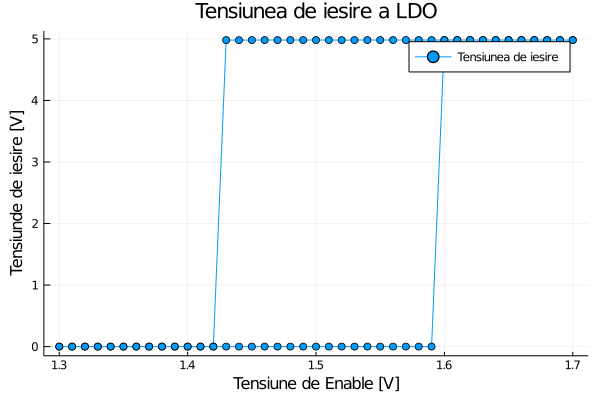

In [28]:
h=plot(Ve_meas, Vo_meas; markershape=:circle, label="Tensiunea de iesire");
title!("Tensiunea de iesire a LDO");
xlabel!("Tensiune de Enable [V]");
ylabel!("Tensiunde de iesire [V]");
display(h)

1.3.7 Salvarea datelor in fisierul .csv

In [29]:
df = DataFrame("Tensiune de Enable [V]" => Ve_meas, "Tensiunde de iesire [V]" => Vo_meas)
CSV.write("03_LDO_Vo_vs_Ve.csv", df)

"03_LDO_Vo_vs_Ve.csv"

1.3.8 Deconectarea instrumentelor

In [30]:
disconnect!(dmm_handle)
disconnect!(psu_handle)

0

#### 1.4 Desfasurarea lucrarii:

1. Modificați codul pentru a înlocui variabila "crt_volt" (tensiunea de la ieșirea sursei de alimentare) cu tensiunea măsurată de sursa de alimentare. 